<a href="https://colab.research.google.com/github/lee-j-j/LJJ/blob/main/OpenCV_022_%EC%96%BC%EA%B5%B4%EC%9D%B8%EC%8B%9D2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://arome1004.cafe24.com/images/opencv/lecture_image/00_title.png"></center>

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[22차시] 학습목표</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>
        
○ 딥러닝 기반 얼굴 추출 알고리즘에 대해 이해하고 사용할 수 있다.<br><br>
○ 딥러닝 기반 얼굴 인식 알고리즘에 대해 이해하고 사용할 수 있다.        
        </font></td></tr>   
</table>

# 딥러닝 기반 얼굴 추출

## SSD (Single Shot Dectector)
- 2015년 발표
- 다른 모델은 객체 감지를 위해 이미지를 2번 이상 반복하는 것에 반해 1번만으로 객체 감지
- 백본 모델(피쳐 맵 추출기로 작동하는 일반적인 사전 학습된 이미지 분류 네트워크)과 SSD 헤드(두 개의 컨볼루션 레이어로 구성, 바운딩박스 출력)로 구성

- 참고 : https://github.com/amdegroot/ssd.pytorch

## MTCNN (Multi-Task Cascaded Convolutional Neural Network)

- 2016년 4월 발표
- 3단계의 CNN으로 구성
  - P-Net (Proposed Net) : 얕은 CNN을 통해 후보 창을 신속하게 생성
  - R-Net (Refine Net) : 더 복잡한 CNN을 통해 많은 수의 얼굴이 아닌 바운딩 박스를 제외하여 구체화
  - O-Net (Output Net) : 강력한 CNN을 사용하여 결과를 구체화하고 다섯 개의 얼굴 랜드 마크 위치를 출력

- 논문 : https://kpzhang93.github.io/MTCNN_face_detection_alignment/paper/spl.pdf
- 참고 : https://github.com/ipazc/mtcnn

<center><img src="https://arome1004.cafe24.com/images/opencv/lecture_image/22_mtcnn.jpg" width="30%"> </center>   

In [3]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 10.9 MB/s eta 0:00:00


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/사물지능A

/content/drive/MyDrive/Colab Notebooks/사물지능A


1/1 [==============================] - 0s 146ms/step


1/1 [==============================] - 0s 176ms/step
[{'box': [257, 315, 103, 140], 'confidence': 0.9999536871910095, 'keypoints': {'left_eye': (285, 371), 'right_eye': (332, 367), 'nose': (311, 402), 'mouth_left': (287, 417), 'mouth_right': (336, 413)}}, {'box': [136, 273, 119, 139], 'confidence': 0.9892764091491699, 'keypoints': {'left_eye': (182, 319), 'right_eye': (225, 342), 'nose': (194, 347), 'mouth_left': (159, 364), 'mouth_right': (200, 384)}}, {'box': [376, 307, 136, 135], 'confidence': 0.9875848293304443, 'keypoints': {'left_eye': (420, 384), 'right_eye': (460, 349), 'nose': (458, 386), 'mouth_left': (456, 421), 'mouth_right': (490, 393)}}, {'box': [205, 193, 124, 126], 'confidence': 0.9416548013687134, 'keypoints': {'left_eye': (247, 241), 'right_eye': (274, 250), 'nose': (252, 273), 'mouth_left': (242, 277), 'mouth_right': (263, 286)}}, {'box': [418, 8, 141, 160], 'confidence': 0.8087860941886902, 'keypoints': {'left_eye': (494, 75), 'right_eye': (515, 95), 'nose': (493, 1

(-0.5, 727.5, 500.5, -0.5)

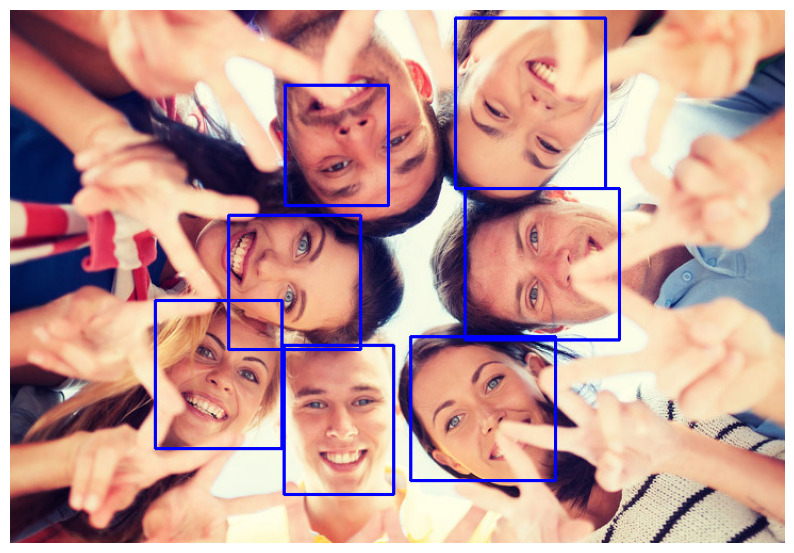

In [ ]:
from mtcnn import MTCNN
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./images/faces4.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# detector 초기화
detector = MTCNN()

# 얼굴 추출
faces = detector.detect_faces(img)

print(faces)

for face in faces:
    # 정확도가 70% 이상인 경우만 출력
    if face['confidence'] >= 0.7:
        x, y, w, h = face['box']
        # 얼굴 영역 출력
        cv2.rectangle(img, (x,y), (x+w, y+h), (0, 0, 255), 2)

        # 5개의 랜드마크 점 출력 (두 눈, 코, 입 양쪽)
        # keypoints = face['keypoints']
        # cv2.circle(img, (keypoints['left_eye']), 2, (255, 0, 0), 2)
        # cv2.circle(img, (keypoints['right_eye']), 2, (255, 0, 0), 2)
        # cv2.circle(img, (keypoints['nose']), 2, (255, 0, 0), 2)
        # cv2.circle(img, (keypoints['mouth_left']), 2, (255, 0, 0), 2)
        # cv2.circle(img, (keypoints['mouth_right']), 2, (255, 0, 0), 2)

plt.figure(figsize = (10,10))
plt.imshow(img)
plt.axis('off')

## DSFD (Dual Shot Face Dectector)

- 2019년 4월 발표
- 2개의 스트림 형태로 구성
- 논문 : https://arxiv.org/abs/1810.10220
- 참고 : https://github.com/yxlijun/DSFD.pytorch
- face_detection 참고 : https://pypi.org/project/face-detection/

<center><img src="https://arome1004.cafe24.com/images/opencv/lecture_image/22_dsfd.png" width="50%">  </center>  


In [4]:
# 다양한 형태의 얼굴 추출기를 사용할 수 있는 라이브러리
!pip install face_detection

  Preparing metadata (setup.py) ... done
  Created wheel for face_detection: filename=face_detection-0.2.2-py3-none-any.whl size=25553 sha256=c7a567c34c44771c78b7e9147c2289501040c57a5165149dd15938ba89fb7e4f
  Stored in directory: /root/.cache/pip/wheels/f9/14/a1/617e184738e71e46c1e75f068f67a911917ae5d02faeabc4e4
Successfully built face_detection


In [ ]:
# OMP: Error #15: Initializing libiomp5md.dll, but found libiomp5md.dll already initialized 오류가 나는 경우
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

Downloading: "https://folk.ntnu.no/haakohu/RetinaFace_ResNet50.pth" to /root/.cache/torch/hub/checkpoints/RetinaFace_ResNet50.pth
100%|██████████| 104M/104M [00:06<00:00, 15.6MB/s]
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


[[257.4646     312.66315    360.2346     460.8596       0.99986744]
 [139.97913    281.61597    242.90996    417.27228      0.9997985 ]
 [432.4868     181.75897    571.41205    296.885        0.99973017]
 [420.9149      -2.3661172  554.5555     196.54643      0.9996574 ]
 [260.86044     19.629827   404.58218    217.59068      0.99918956]
 [195.19693    204.30803    327.18912    293.76538      0.9941316 ]
 [383.75598    317.6575     502.02585    437.24063      0.9871789 ]]


(-0.5, 727.5, 500.5, -0.5)

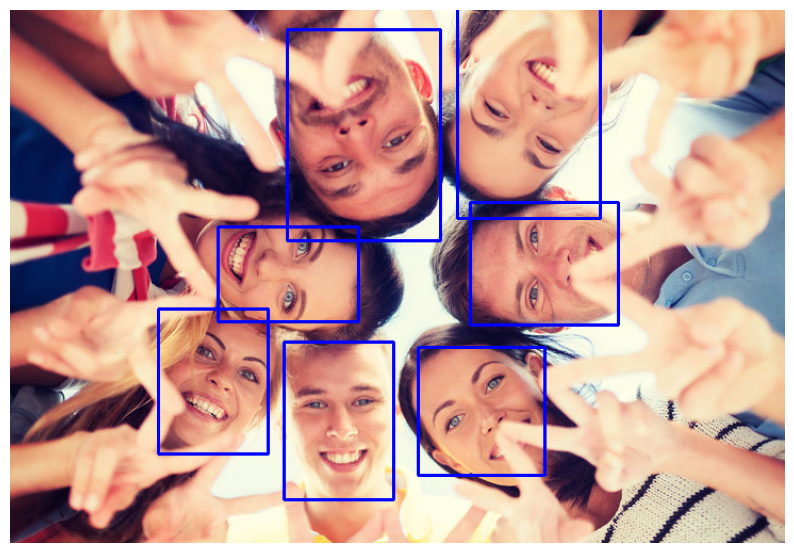

In [5]:
import face_detection
import cv2
import matplotlib.pyplot as plt

# detector 초기화
# confidence_threshold : 정확도 임계치
# nms_iou_threshold : iou 임계치
# 모델의 종류 : DSFDDetector, RetinaNetResNet50, RetinaNetMobileNetV1（가장 좋음)
detector = face_detection.build_detector("RetinaNetResNet50",
                                         confidence_threshold=.5,
                                         nms_iou_threshold=.3) # iou : 교집합(비율)

img = cv2.imread("./images/faces4.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 얼굴 영역 반환 (x1, y1, x2, y2, 정확도)
faces = detector.detect(img)

print(faces)

for (x1, y1, x2, y2, conf) in faces:
    if conf >= 0.9:
        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)),
                      (0, 0, 255), 2)

plt.figure(figsize = (10,10))
plt.imshow(img)
plt.axis('off')

## RetinaFace

- 2019년 5월 발표
- 성능이 매우 우수한 얼굴인식기 (mxnet 기반)
- 참고 : https://github.com/serengil/retinaface

In [6]:
!pip install retina-face

In [8]:
from retinaface import RetinaFace
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./images/faces4.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 얼굴 영역 표시
result = RetinaFace.detect_faces("./images/faces4.jpg")

print(result)

# 첫 번째 데이터만 출력
print(result["face_1"])

{'face_1': {'score': 0.9999904036521912, 'facial_area': [413, 178, 595, 289], 'landmarks': {'right_eye': [486.28766, 280.68268], 'left_eye': [479.18723, 207.33089], 'nose': [521.18427, 238.80843], 'mouth_right': [562.3892, 261.1716], 'mouth_left': [556.7553, 204.40172]}}, 'face_2': {'score': 0.9999616742134094, 'facial_area': [177, 191, 334, 296], 'landmarks': {'right_eye': [280.75238, 227.2306], 'left_eye': [262.05222, 287.77698], 'nose': [236.6104, 246.69492], 'mouth_right': [212.37022, 202.40645], 'mouth_left': [196.65312, 250.42664]}}, 'face_3': {'score': 0.9998961091041565, 'facial_area': [263, 29, 395, 219], 'landmarks': {'right_eye': [335.333, 143.35367], 'left_eye': [322.8283, 148.13266], 'nose': [322.24728, 105.65195], 'mouth_right': [323.4735, 55.103893], 'mouth_left': [314.13644, 58.106205]}}, 'face_4': {'score': 0.9998304843902588, 'facial_area': [424, 13, 546, 188], 'landmarks': {'right_eye': [501.4331, 126.32812], 'left_eye': [473.6819, 122.167755], 'nose': [489.55426, 85

(-0.5, 727.5, 500.5, -0.5)

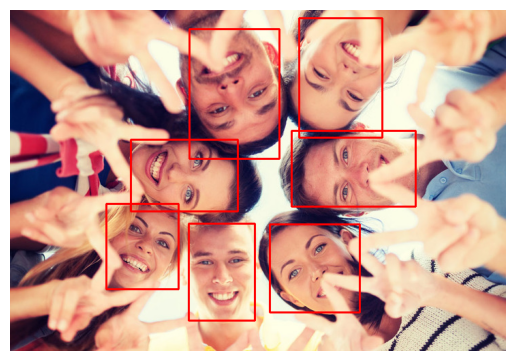

In [9]:
# 정수형으로 변환해서 튜플로 반환
def int_tuple(t):
    return tuple(int(x) for x in t)

for key in result:
    # 키 값들을 가져온다
    identity = result[key]
    # facial_area 키 값을 가져온다 (얼굴 영역)
    facial_area = identity["facial_area"]

    # 눈, 코, 입 표시
    # landmarks = identity["landmarks"]
    # cv2.circle(img, int_tuple(landmarks["left_eye"]), 3, (0, 0, 255), -1)
    # cv2.circle(img, int_tuple(landmarks["right_eye"]), 3, (0, 0, 255), -1)
    # cv2.circle(img, int_tuple(landmarks["nose"]), 3, (0, 0, 255), -1)
    # cv2.circle(img, int_tuple(landmarks["mouth_left"]), 3, (0, 0, 255), -1)
    # cv2.circle(img, int_tuple(landmarks["mouth_right"]), 3, (0, 0, 255), -1)

    # x2, y2, x1, y1
    cv2.rectangle(img, (facial_area[2], facial_area[3]),
                  (facial_area[0], facial_area[1]), (255, 0, 0), 2)

plt.imshow(img)
plt.axis('off')

- 군중 얼굴 영역 추출

{'face_1': {'score': 0.9996707439422607, 'facial_area': [140, 269, 162, 294], 'landmarks': {'right_eye': [150.37509, 277.79114], 'left_eye': [159.05905, 277.9323], 'nose': [156.37935, 283.21906], 'mouth_right': [150.90741, 287.91672], 'mouth_left': [157.83708, 288.21042]}}, 'face_2': {'score': 0.9996210932731628, 'facial_area': [198, 382, 223, 411], 'landmarks': {'right_eye': [206.05008, 391.63757], 'left_eye': [217.72047, 391.60568], 'nose': [212.48895, 398.8063], 'mouth_right': [206.39302, 402.8268], 'mouth_left': [217.246, 402.8654]}}, 'face_3': {'score': 0.999421238899231, 'facial_area': [185, 224, 204, 246], 'landmarks': {'right_eye': [190.80368, 232.60445], 'left_eye': [199.99902, 233.0804], 'nose': [195.08199, 235.59152], 'mouth_right': [191.19026, 240.60127], 'mouth_left': [198.25682, 241.0224]}}, 'face_4': {'score': 0.9993597865104675, 'facial_area': [516, 248, 535, 270], 'landmarks': {'right_eye': [522.694, 255.44547], 'left_eye': [531.4229, 253.82613], 'nose': [529.25256, 25

(-0.5, 959.5, 719.5, -0.5)

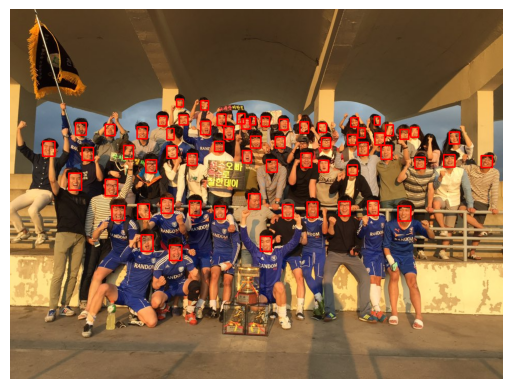

In [15]:
from retinaface import RetinaFace
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./images/faces002.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 얼굴 영역 표시
result = RetinaFace.detect_faces("./images/faces002.jpg")

print(result)

# 첫 번째 데이터만 출력
print(result["face_1"])

# 정수형으로 변환해서 튜플로 반환
def int_tuple(t):
    return tuple(int(x) for x in t)

for key in result:
    # 키 값들을 가져온다
    identity = result[key]
    # facial_area 키 값을 가져온다 (얼굴 영역)
    facial_area = identity["facial_area"]

    # 눈, 코, 입 표시
    # landmarks = identity["landmarks"]
    # cv2.circle(img, int_tuple(landmarks["left_eye"]), 3, (0, 0, 255), -1)
    # cv2.circle(img, int_tuple(landmarks["right_eye"]), 3, (0, 0, 255), -1)
    # cv2.circle(img, int_tuple(landmarks["nose"]), 3, (0, 0, 255), -1)
    # cv2.circle(img, int_tuple(landmarks["mouth_left"]), 3, (0, 0, 255), -1)
    # cv2.circle(img, int_tuple(landmarks["mouth_right"]), 3, (0, 0, 255), -1)

    # x2, y2, x1, y1
    cv2.rectangle(img, (facial_area[2], facial_area[3]),
                  (facial_area[0], facial_area[1]), (255, 0, 0), 2)

plt.imshow(img)
plt.axis('off')

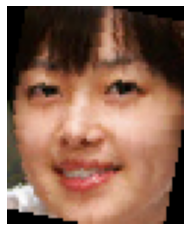

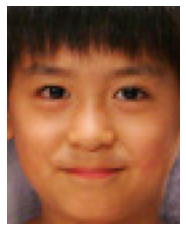

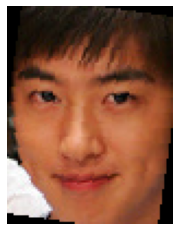

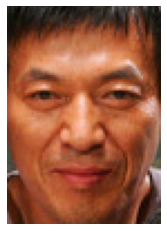

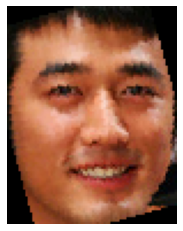

In [ ]:
# 얼굴 ROI 영역 추출
result = RetinaFace.extract_faces("./images/face.jpg")

for img in result:
    plt.imshow(img)
    plt.axis('off')
    plt.show()

## YuNet

- 2021년 10월 발표
- CNN기반 얼굴 탐지기로 가볍고 빠름 (모델이 MB 미만)
- 백본으로 mobilenet을 채택하고 총 85,000 개의 매개 변수를 포함
- 정면얼굴이 아닌 경우에도 잘 동작
- 참고 : https://github.com/opencv/opencv_zoo/tree/master/models/face_detection_yunet
- 모델 훈련 : https://github.com/ShiqiYu/libfacedetection.train

[[ 2.60352600e+02  3.27614990e+02  9.75396957e+01  1.33210724e+02
   2.86926605e+02  3.73057800e+02  3.33865295e+02  3.71207855e+02
   3.12746216e+02  3.96485107e+02  2.95776825e+02  4.23050903e+02
   3.31812286e+02  4.20209412e+02  9.07145262e-01]
 [ 4.20709686e+02  1.77113342e+01  1.20392952e+02  1.60843277e+02
   4.78473206e+02  7.10198212e+01  5.24836914e+02  7.54518661e+01
   5.04307678e+02  1.05028206e+02  4.71573120e+02  1.28757935e+02
   5.07707123e+02  1.34128540e+02  7.99015641e-01]
 [ 2.65684631e+02  4.53185349e+01  1.30249756e+02  1.46755630e+02
   2.93943970e+02  1.12587669e+02  3.48260254e+02  9.94889679e+01
   3.22806946e+02  1.28047913e+02  3.09962738e+02  1.52131683e+02
   3.60460205e+02  1.40517761e+02  7.73308933e-01]
 [-1.94562912e+00  3.30363281e+02  6.14751358e+01  8.96826096e+01
   8.04989910e+00  3.60762329e+02  3.38324203e+01  3.61764526e+02
   1.89543095e+01  3.80137939e+02  5.49073410e+00  3.94239868e+02
   2.57837257e+01  3.95392944e+02  5.30958474e-01]
 [ 1

(-0.5, 727.5, 500.5, -0.5)

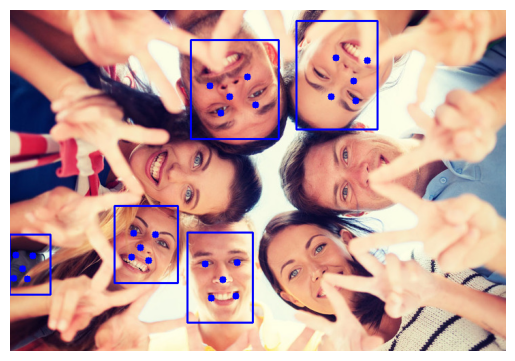

In [19]:
import numpy as np

detector = cv2.FaceDetectorYN.create("./images/face_detection_yunet_2023mar.onnx", "", (0, 0),
                                     score_threshold=0.4, nms_threshold=0.2)

img = cv2.imread("./images/faces4.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

w, h, _ = img.shape

detector.setInputSize((h, w))

_, faces = detector.detect(img)

print(faces)

for face in faces:
    box = list(map(int, face[:4]))
    cv2.rectangle(img, box, (0, 0, 255), 2)

    # 랜드마크 5개 표시하기
    landmarks = list(map(int, face[4:len(face)-1]))
    landmarks = np.array_split(landmarks, len(landmarks) / 2)

    for landmark in landmarks:
        cv2.circle(img, landmark, 5, (0, 0, 255), -1)

plt.imshow(img)
plt.axis('off')

## 얼굴인식

- 실시간 오픈 소스 얼굴인식 소프트웨어
  - 딥 페이스 : https://github.com/serengil/deepface?ref=hackernoon.com
    - FaceNet 및 InsightFace와 같은 다양한 얼굴 인식 방법을 지원
    - Python 개발자라면 시작하기 쉽지만 다른 사람들이 통합하기 어려움
  - CompareFace : https://github.com/exadel-inc/CompreFace
    - REST API를 사용하면 사전 기계 학습 기술 없이도 시스템에 쉽게 통합 가능
    - 확장 가능하므로 여러 비디오 스트림에서 얼굴을 동시에 인식 가능
    - FaceNet과 InsightFace 선택 가능
    - 현재 개발 중
  - face_recognition : https://github.com/ageitgey/face_recognition?ref=hackernoon.com
    - 인기있는 API이지만 큰 개선 사항이 없고 상당히 오래된 얼굴 인식 모델을 사용
  - FaceNet : https://github.com/davidsandberg/facenet?ref=hackernoon.com
    - 정확도가 매우 높은 API지만 개선이 없음
  - InsightFace : https://github.com/deepinsight/insightface?ref=hackernoon.com
    - 얼굴 감지를 위해 가장 최근의 정확한 얼굴 인식 방법 중 하나
    - LetinaFace 및 SubCenter-ArcFace를 지원
    - 사용하기 쉽지 않다는 단점
  - InsightFace-REST : https://github.com/SthPhoenix/InsightFace-REST?ref=hackernoon.com
    - 2021년부터 생성된 API로 인식속도 향상 버전
    - 얼굴 임베딩만 제공하므로 분류기는 따로 만들어야 함
    
    
- 참고 사이트
  - https://sefiks.com/2020/06/03/mastering-face-recognition-with-ensemble-learning/

### face recognition 기반 이미지 내 얼굴 인식

- face_recognition : 업데이터 중지, 오래된 모델
  - https://wiserloner.tistory.com/1123

### 딥페이스 기반 얼굴인식

- 딥페이스
  - 다양한 얼굴 모델 사용 사용 가능

In [20]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 7.9 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=3868b0f24f38b23ebd204714f2d17ca60930963500991370b84f2a080c243483
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


In [21]:
!pip install lightgbm

In [22]:
from deepface import DeepFace

# 사용할 모델 종류
# Ensemble : 여러개의 모델을 사용
models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace",
          "DeepFace", "ArcFace", "Dlib", "Ensemble"]

# 평가 방법
metrics = ["cosine", "euclidean", "euclidean_l2"]

# 검출 방법
backends = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface', 'mediapipe']

#### 얼굴 영역 검출

TypeError: ignored

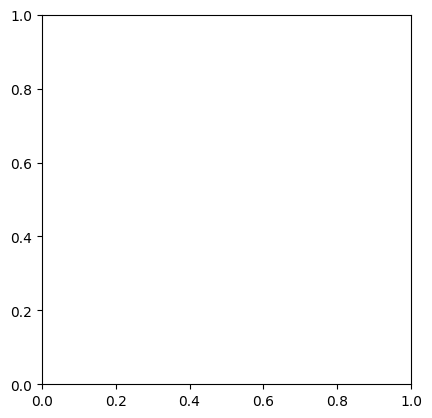

In [25]:
import matplotlib.pyplot as plt

face1 = "./images/faces4.jpg"

# 얼굴 영역 검출
face = DeepFace.extract_faces(img_path =face1,
                             target_size = (224, 224),
                             detector_backend = backends[4])

#print(face)
plt.imshow(face)
plt.xticks([]), plt.yticks([])

#### 얼굴인식을 위한 특징 데이터 추출

In [ ]:
embedding = DeepFace.represent(img_path=face1,
                               model_name=models[6],
                               detector_backend = backends[4])

embedding

[-0.14555220305919647,
 0.17215974628925323,
 0.10932131111621857,
 -0.024092691019177437,
 -0.07616974413394928,
 -0.0675969123840332,
 -0.040875405073165894,
 -0.10060861706733704,
 0.11945560574531555,
 -0.052389614284038544,
 0.2618715465068817,
 -0.11454614996910095,
 -0.2240115851163864,
 -0.07424245029687881,
 0.03642348200082779,
 0.13706377148628235,
 -0.17796950042247772,
 -0.13838620483875275,
 -0.08558731526136398,
 -0.13258805871009827,
 0.005004538223147392,
 -0.006313716992735863,
 -0.009968209080398083,
 0.04069880396127701,
 -0.14263002574443817,
 -0.29571714997291565,
 -0.0623476579785347,
 -0.1017022356390953,
 0.08240047097206116,
 -0.044547077268362045,
 0.027526307851076126,
 0.09221500158309937,
 -0.12714409828186035,
 -0.00837303139269352,
 0.01710357517004013,
 0.107587531208992,
 0.004785251338034868,
 -0.07426419109106064,
 0.14359334111213684,
 -0.04486846551299095,
 -0.1597321331501007,
 -0.07988805323839188,
 0.043559394776821136,
 0.26514410972595215,
 0.

#### 2개의 얼굴 비교하기

In [ ]:
face1 = './images/face_info/Elon1.jpg'
face2 = './images/face_info/Elon2.jpg'
face3 = './images/face_info/Bill.jpg'

# model_name : 사용할 인식 모델
# distance_metric : 평가방법
# detector_backend : 얼굴 영역 검출 방법
result = DeepFace.verify(img1_path=face1, img2_path=face2,
                         model_name=models[7],
                         distance_metric=metrics[0],
                         detector_backend = backends[4])

result

Loading DeepFace: 100%|████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 2006.84it/s]


face-recognition-ensemble-model.txt will be downloaded...


Downloading...
From: https://raw.githubusercontent.com/serengil/deepface/master/deepface/models/face-recognition-ensemble-model.txt
To: C:\Users\EGEG\.deepface\weights\face-recognition-ensemble-model.txt
87.1kB [00:00, 10.9MB/s]                                                                                               


{'verified': True,
 'score': 0.9952928659719859,
 'distance': [0.09243905641399786,
  0.34586506771327635,
  0.4299745490467969,
  0.2082852596594289,
  7.963353519699468,
  0.6454227446556695,
  0.13394241206934032,
  0.5175759114745204,
  0.25558678229460363,
  74.01462743533615,
  0.7149640302764942],
 'model': ['VGG-Face', 'Facenet', 'OpenFace', 'DeepFace'],
 'similarity_metric': ['cosine', 'euclidean', 'euclidean_l2']}

#### 얼굴 DB에서 유사한 얼굴 검색하기

In [ ]:
# 얼굴 DB에서 동일 얼굴 검색 (검색하고자 하는 얼굴이미지는 다른 폴더에)
face0 = './images/Elon1.jpg'

# enforce_detection=False : 얼굴을 감지할 수 없어도 예외를 발생시키지 않음
df = DeepFace.find(img_path=face0, db_path = "./images/face_info/",
                   model_name=models[6],
                   distance_metric=metrics[0],
                   detector_backend = backends[4])

df

There are  7  representations found in  representations_dlib.pkl
find function lasts  1.6677672863006592  seconds


,identity,Dlib_cosine
0,./images/face_info//Elon2.jpg,0.059925


#### 나이, 성별, 인종, 표정 분석하기

In [ ]:
# 얼굴의 상태 비교 (나이, 성별, 인종, 표정)
# 인종 : asian, white, middle eastern, indian, latino, black
# 표정 : angry, fear, neutral, sad, disgust, happy, surprise

face0 = './images/Elon1.jpg'

obj = DeepFace.analyze(img_path=face0,
                       actions = ['age', 'gender', 'race', 'emotion'],
                       detector_backend = backends[4])

obj

Action: emotion: 100%|███████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.27it/s]


{'age': 34,
 'region': {'x': 114, 'y': 102, 'w': 215, 'h': 280},
 'gender': 'Man',
 'race': {'asian': 17.659088969230652,
  'indian': 3.215765953063965,
  'black': 1.02080088108778,
  'white': 35.07978022098541,
  'middle eastern': 9.75087285041809,
  'latino hispanic': 33.27369689941406},
 'dominant_race': 'white',
 'emotion': {'angry': 0.5979376735799118,
  'disgust': 0.0008875995792275044,
  'fear': 2.5076293949859974,
  'happy': 38.88404601121223,
  'sad': 43.261023954214096,
  'surprise': 0.018498027577413027,
  'neutral': 14.729977532027812},
 'dominant_emotion': 'sad'}

#### 카메라 영상에서 얼굴 DB에 저장된 얼굴 검색

In [ ]:
# q를 눌러서 종료
DeepFace.stream(
    db_path="./image/face_info/",
    model_name=models[6],
    distance_metric=metrics[0],
    detector_backend = backends[4]
)

Detector backend is  retinaface
Emotion model loaded
Age model loaded
Gender model loaded
Facial attibute analysis models loaded in  0.0009970664978027344  seconds


Finding embeddings: 0it [00:00, ?it/s]


Embeddings found for given data set in  0.009879112243652344  seconds


<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[22차시] 정리하기</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>○            
        </font></td></tr>   
</table>